In [1]:
#%%
import pyxdf
import matplotlib.pyplot as plt
import numpy as np

data, header = pyxdf.load_xdf('emotibit_data/LSL_recording_timestamps/06032023/exp001/block_Default.xdf')
for stream in data:
    y = stream['time_series']
    fig,ax = plt.subplots(1,1)

    if isinstance(y, list):
        # list of strings, draw one vertical line for each marker
        for timestamp, marker in zip(stream['time_stamps'], y):
            plt.axvline(x=timestamp)
            print(f'Marker "{marker[0]}" @ {timestamp:.2f}s')
    elif isinstance(y, np.ndarray):
        # numeric data, draw as lines
        plt.plot(stream['time_stamps'], y)
    else:
        raise RuntimeError('Unknown stream format')

# %%     Check signal latency
signal_latency=np.diff(stream['time_stamps'])

fig, ax = plt.subplots(1,1)
ax.hist(signal_latency,bins=10,histtype='barstacked')
ax.set_xlabel('Latency')
ax.set_ylabel('Frecuency')
ax.set_title('Signal latency')
ax.text(np.mean(signal_latency),2,'Max latency {}'.format(max(signal_latency)),fontsize=10)
ax.text(np.mean(signal_latency),1,'Mean latency {}'.format(np.mean(signal_latency)),fontsize=10)
plt.show()



Exception: file emotibit_data\LSL_recording_timestamps\06032023\exp001\block_Default.xdf does not exist.

In [3]:
import pandas as pd 
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import pyxdf


In [4]:
recording_location = r"C:\Users\Bolo\Desktop\Laboratorio\incipit\data\pupil_emotibit\ES0001_S002_PC_EM\data\lsl"

def print_file_structure(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print(f'{subindent}{f}')
print_file_structure(recording_location)

lsl/
    exp001/
        block_Default.xdf


In [5]:
exported_lsl_csv = os.path.join(recording_location, 'exp001', 'block_Default.xdf')
# lsl_pd_frame = pd.read_csv(exported_pupil_csv)

In [6]:
data, header = pyxdf.load_xdf(exported_lsl_csv)


In [7]:
lsl_events_data=data[3]
pupil_data=data[1]

In [6]:
lsl_events=lsl_events_data['time_series']

In [14]:
pupil_data_events=pupil_data['time_stamps']
pupil_data_events

array([14973.03008695, 14973.03407995, 14973.03811145, ...,
       17015.12681578, 17015.13481378, 17015.14277978])

In [40]:
pupil_info=pupil_data['info']
type(pupil_info['desc'][0][''])



collections.defaultdict

In [42]:
pupil_info['desc'][0]['channels'][0]['channel'][0]

defaultdict(list,
            {'label': ['confidence'],
             'eye': ['both'],
             'type': ['Confidence'],
             'unit': ['normalized']})

In [58]:
pupil_info['desc'][0]['channels'][0]['channel']
pupil_channels=[print(channel['label']) for channel in pupil_info['desc'][0]['channels'][0]['channel']]

['confidence']
['norm_pos_x']
['norm_pos_y']
['gaze_point_3d_x']
['gaze_point_3d_y']
['gaze_point_3d_z']
['eye_center0_3d_x']
['eye_center0_3d_y']
['eye_center0_3d_z']
['eye_center1_3d_x']
['eye_center1_3d_y']
['eye_center1_3d_z']
['gaze_normal0_x']
['gaze_normal0_y']
['gaze_normal0_z']
['gaze_normal1_x']
['gaze_normal1_y']
['gaze_normal1_z']
['diameter0_2d']
['diameter1_2d']
['diameter0_3d']
['diameter1_3d']


reoder image order list for comparison

In [35]:
def order_image():
    print('helllo')

image_order=os.listdir('../../../../data/pupil_emotibit/ES0001_S002_PC_EM/images_order')
image_order.remove('assets.txt')
image_order.sort(key=lambda x: int(x[x.index('_')+1:x.index('.tif')]))
image_order

['Asset0005_01.tif',
 'Asset0044_02.tif',
 'Asset0032_03.tif',
 'Asset0030_04.tif',
 'Asset0033_05.tif',
 'Asset0041_06.tif',
 'Asset0042_07.tif',
 'Asset0021_08.tif',
 'Asset0039_09.tif',
 'Surprise03_10.tif',
 'Asset0046_11.tif',
 'Asset0011_12.tif',
 'Asset0035_13.tif',
 'Asset0050_14.tif',
 'Asset0004_15.tif',
 'Asset0009_16.tif',
 'Asset0022_17.tif',
 'Asset0016_18.tif',
 'Asset0007_19.tif',
 'Asset0006_20.tif',
 'Surprise02_21.tif',
 'Asset0031_22.tif',
 'Asset0048_23.tif',
 'Asset0001_24.tif',
 'Asset0012_25.tif',
 'Asset0036_26.tif',
 'Asset0043_27.tif',
 'Asset0018_28.tif',
 'Asset0047_29.tif',
 'Surprise04_30.tif',
 'Asset0045_31.tif',
 'Asset0034_32.tif',
 'Asset0028_33.tif',
 'Asset0017_34.tif',
 'Asset0008_35.tif',
 'Asset0037_36.tif',
 'Asset0002_37.tif',
 'Asset0026_38.tif',
 'Asset0027_39.tif',
 'Asset0024_40.tif',
 'Asset0049_41.tif',
 'Surprise01_42.tif',
 'Asset0003_43.tif',
 'Asset0029_44.tif',
 'Asset0020_45.tif',
 'Asset0015_46.tif',
 'Asset0040_47.tif',
 'Asset00

In [92]:
%matplotlib qt
sns.set_theme()
lsl_events_time=lsl_events_data['time_stamps']
lsl_events_time=np.delete(lsl_events_time,-1)


diff_time=np.diff(lsl_events_time)
diff_time_events=np.diff(lsl_events_time[2::3])

fig1,ax1=plt.subplots(1,2)
sns.histplot(data=diff_time,ax= ax1[0],bins=20)
sns.histplot(data=diff_time_events,ax= ax1[1],bins=20)
ax1[0].set_title('Test of time interval for all events in emotibit')
ax1[1].set_title('Test of time interval for assets/surprise/control in emotibit')
fig1.tight_layout()

In [89]:
lsl_events[2::3]

[['Asset0005.tif'],
 ['Asset0044.tif'],
 ['Asset0032.tif'],
 ['Asset0030.tif'],
 ['Asset0033.tif'],
 ['Asset0041.tif'],
 ['Asset0042.tif'],
 ['Asset0021.tif'],
 ['Asset0039.tif'],
 ['Surprise03.tif'],
 ['Asset0046.tif'],
 ['Asset0011.tif'],
 ['Asset0035.tif'],
 ['Asset0050.tif'],
 ['Asset0004.tif'],
 ['Asset0009.tif'],
 ['Asset0022.tif'],
 ['Asset0016.tif'],
 ['Asset0007.tif'],
 ['Asset0006.tif'],
 ['Surprise02.tif'],
 ['Asset0031.tif'],
 ['Asset0048.tif'],
 ['Asset0001.tif'],
 ['Asset0012.tif'],
 ['Asset0036.tif'],
 ['Asset0043.tif'],
 ['Asset0018.tif'],
 ['Asset0047.tif'],
 ['Surprise04.tif'],
 ['Asset0045.tif'],
 ['Asset0034.tif'],
 ['Asset0028.tif'],
 ['Asset0017.tif'],
 ['Asset0008.tif'],
 ['Asset0037.tif'],
 ['Asset0002.tif'],
 ['Asset0026.tif'],
 ['Asset0027.tif'],
 ['Asset0024.tif'],
 ['Asset0049.tif'],
 ['Surprise01.tif'],
 ['Asset0003.tif'],
 ['Asset0029.tif'],
 ['Asset0020.tif'],
 ['Asset0015.tif'],
 ['Asset0040.tif'],
 ['Asset0014.tif'],
 ['Asset0010.tif']]

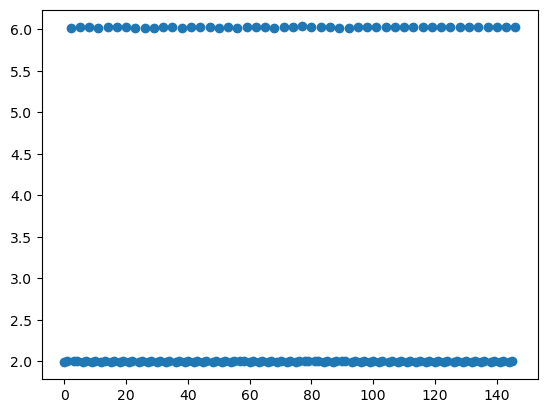

In [71]:

fig, ax=plt.subplots(1,1)
ax.plot(diff_time,'o')

In [60]:
lsl_events_time=lsl_events_data['time_stamps']
lsl_events_time=np.delete(lsl_events_time,-2)

In [61]:
lsl_events_time

array([15054.34907073, 15056.33610014, 15058.33620924, 15064.35637756,
       15066.35299557, 15068.35281957, 15074.37747799, 15076.3693912 ,
       15078.36945801, 15084.39298502, 15086.38624953, 15088.38622004,
       15094.40103776, 15096.38650976, 15098.38634537, 15104.41003469,
       15106.402945  , 15108.4029025 , 15114.42924502, 15116.41972113,
       15118.41972233, 15124.44576615, 15126.43648896, 15128.43639077,
       15134.45967498, 15136.45328109, 15138.4530611 , 15144.47566232,
       15146.46974902, 15148.46979643, 15154.48535135, 15156.46972846,
       15158.46998396, 15164.49880598, 15166.48650829, 15168.48652989,
       15174.51414911, 15176.50319612, 15178.50322113, 15184.52657434,
       15186.52018355, 15188.51991506, 15194.54520438, 15196.53663348,
       15198.53678769, 15204.56159491, 15206.55371632, 15208.55341152,
       15214.57789454, 15216.56990825, 15218.57222195, 15224.59515667,
       15226.58671598, 15228.58679439, 15234.6138471 , 15236.60341471,
      

In [48]:
lsl_events_time

array([15054.34907073, 15056.33610014, 15058.33620924, 15064.35637756,
       15066.35299557, 15068.35281957, 15074.37747799, 15076.3693912 ,
       15078.36945801, 15084.39298502, 15086.38624953, 15088.38622004,
       15094.40103776, 15096.38650976, 15098.38634537, 15104.41003469,
       15106.402945  , 15108.4029025 , 15114.42924502, 15116.41972113,
       15118.41972233, 15124.44576615, 15126.43648896, 15128.43639077,
       15134.45967498, 15136.45328109, 15138.4530611 , 15144.47566232,
       15146.46974902, 15148.46979643, 15154.48535135, 15156.46972846,
       15158.46998396, 15164.49880598, 15166.48650829, 15168.48652989,
       15174.51414911, 15176.50319612, 15178.50322113, 15184.52657434,
       15186.52018355, 15188.51991506, 15194.54520438, 15196.53663348,
       15198.53678769, 15204.56159491, 15206.55371632, 15208.55341152,
       15214.57789454, 15216.56990825, 15218.57222195, 15224.59515667,
       15226.58671598, 15228.58679439, 15234.6138471 , 15236.60341471,
      

In [33]:
map(key=lambda x: int(x[0][x[0].index('_')+1:x[0].index('.tif')],image_order))

TypeError: map() takes no keyword arguments

In [ ]:
map(key=lambda x: int(x.index('_')+1:x.index('.tif')],image_order))

In [26]:
image_order

['Asset0001_24.tif',
 'Asset0002_37.tif',
 'Asset0003_43.tif',
 'Asset0004_15.tif',
 'Asset0005_01.tif',
 'Asset0006_20.tif',
 'Asset0007_19.tif',
 'Asset0008_35.tif',
 'Asset0009_16.tif',
 'Asset0010_49.tif',
 'Asset0011_12.tif',
 'Asset0012_25.tif',
 'Asset0014_48.tif',
 'Asset0015_46.tif',
 'Asset0016_18.tif',
 'Asset0017_34.tif',
 'Asset0018_28.tif',
 'Asset0020_45.tif',
 'Asset0021_08.tif',
 'Asset0022_17.tif',
 'Asset0024_40.tif',
 'Asset0026_38.tif',
 'Asset0027_39.tif',
 'Asset0028_33.tif',
 'Asset0029_44.tif',
 'Asset0030_04.tif',
 'Asset0031_22.tif',
 'Asset0032_03.tif',
 'Asset0033_05.tif',
 'Asset0034_32.tif',
 'Asset0035_13.tif',
 'Asset0036_26.tif',
 'Asset0037_36.tif',
 'Asset0039_09.tif',
 'Asset0040_47.tif',
 'Asset0041_06.tif',
 'Asset0042_07.tif',
 'Asset0043_27.tif',
 'Asset0044_02.tif',
 'Asset0045_31.tif',
 'Asset0046_11.tif',
 'Asset0047_29.tif',
 'Asset0048_23.tif',
 'Asset0049_41.tif',
 'Asset0050_14.tif',
 'assets.txt',
 'Surprise01_42.tif',
 'Surprise02_21.ti

In [14]:
data[0]['time_series']

array([[ 7.75955141e-01,  4.55041567e-01,  5.69628119e-01, ...,
                    nan,             nan,             nan],
       [ 7.75955141e-01,  4.55015960e-01,  5.69736346e-01, ...,
                    nan,  2.53836844e+00,             nan],
       [ 1.00000000e+00,  2.55630016e-01,  3.97627036e-01, ...,
         2.68913879e+01,             nan,             nan],
       ...,
       [ 0.00000000e+00,  8.18554641e-01,  4.72901508e-01, ...,
                    nan, -1.18811006e-02,             nan],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
                    nan,             nan,             nan],
       [ 0.00000000e+00,  8.18554641e-01,  4.72901508e-01, ...,
                    nan, -1.18811006e-02,             nan]])

In [28]:
type(data[0]['time_series'])

list

In [29]:
type(data[0]['time_series'][2][0])

str

In [30]:
(data[0]['time_stamps'])

array([433716.93253213, 433728.92520411, 433740.91435739, 433752.90969737,
       433764.91313875, 433776.90058112, 433788.8926637 , 433800.92046299,
       433813.76982449])

In [ ]:
file1=r'emotibit_data/LSL_recording_timestamps\2023-01-17_18-09-42-832110_LM.csv'  

In [22]:
data[0]['info']


defaultdict(list,
            {'name': ['pupil_capture'],
             'type': ['Gaze'],
             'channel_count': ['22'],
             'nominal_srate': ['0'],
             'channel_format': ['double64'],
             'source_id': ['04c311e2-b503-47a8-899f-46f361b1469b'],
             'version': ['1.1000000000000001'],
             'created_at': ['262859.16462659999'],
             'uid': ['2670b199-424b-4e69-a489-601dc7e86ceb'],
             'session_id': ['default'],
             'hostname': ['ARTUROV-SFS-USR'],
             'v4address': [None],
             'v4data_port': ['16573'],
             'v4service_port': ['16573'],
             'v6address': [None],
             'v6data_port': ['16573'],
             'v6service_port': ['16573'],
             'desc': [defaultdict(list,
                          {'channels': [defaultdict(list,
                                        {'channel': [defaultdict(list,
                                                      {'label': ['confidence'

In [23]:
data[1]['info']


defaultdict(list,
            {'name': ['DataSyncMarker'],
             'type': ['Tags'],
             'channel_count': ['1'],
             'channel_format': ['string'],
             'source_id': ['12345'],
             'nominal_srate': ['0.000000000000000'],
             'version': ['1.100000000000000'],
             'created_at': ['262872.3055175000'],
             'uid': ['548bca9d-c4a8-44a7-b7a3-85d80e0b34e3'],
             'session_id': ['default'],
             'hostname': ['ARTUROV-SFS-USR'],
             'v4address': [None],
             'v4data_port': ['16572'],
             'v4service_port': ['16572'],
             'v6address': [None],
             'v6data_port': ['16572'],
             'v6service_port': ['16572'],
             'desc': [None],
             'stream_id': 2,
             'effective_srate': 0})

In [24]:
data[2]['info']


defaultdict(list,
            {'name': ['pupil_capture'],
             'type': ['Gaze'],
             'channel_count': ['22'],
             'nominal_srate': ['0'],
             'channel_format': ['double64'],
             'source_id': ['04c311e2-b503-47a8-899f-46f361b1469b'],
             'version': ['1.1000000000000001'],
             'created_at': ['262859.16462659999'],
             'uid': ['2670b199-424b-4e69-a489-601dc7e86ceb'],
             'session_id': ['default'],
             'hostname': ['ARTUROV-SFS-USR'],
             'v4address': [None],
             'v4data_port': ['16573'],
             'v4service_port': ['16573'],
             'v6address': [None],
             'v6data_port': ['16573'],
             'v6service_port': ['16573'],
             'desc': [defaultdict(list,
                          {'channels': [defaultdict(list,
                                        {'channel': [defaultdict(list,
                                                      {'label': ['confidence'